<a href="https://colab.research.google.com/github/MDSOURAVSARKER/Assignment---Classification-Model-Evaluation-/blob/main/MNIST%20Hand%20written%20dataset_CNN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Preprocess the data
# Reshape the images to add a channel dimension (required for Conv2D layers)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [4]:
# Build the CNN model
model = models.Sequential([
    # First Conv Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # First Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Second Conv Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Flatten the output
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(64, activation='relu'),
    # Output Layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8993 - loss: 0.3279 - val_accuracy: 0.9834 - val_loss: 0.0497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9879 - val_loss: 0.0351
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.9853 - val_loss: 0.0420
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9916 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9903 - val_loss: 0.0312


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0384
Test Accuracy: 0.9902999997138977


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


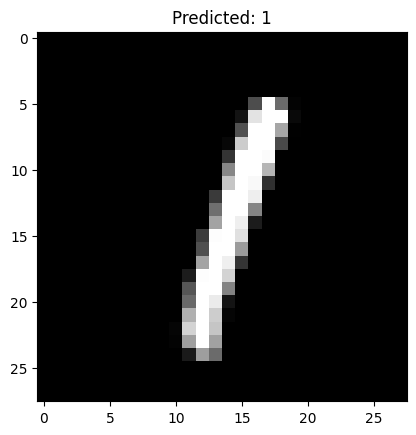

In [10]:
# Visualize predictions
# Plot the first test image and its predicted label
plt.imshow(x_test[5].reshape(28, 28), cmap='gray')
prediction = model.predict(x_test)
plt.title(f"Predicted: {tf.argmax(prediction[5])}")
plt.show()